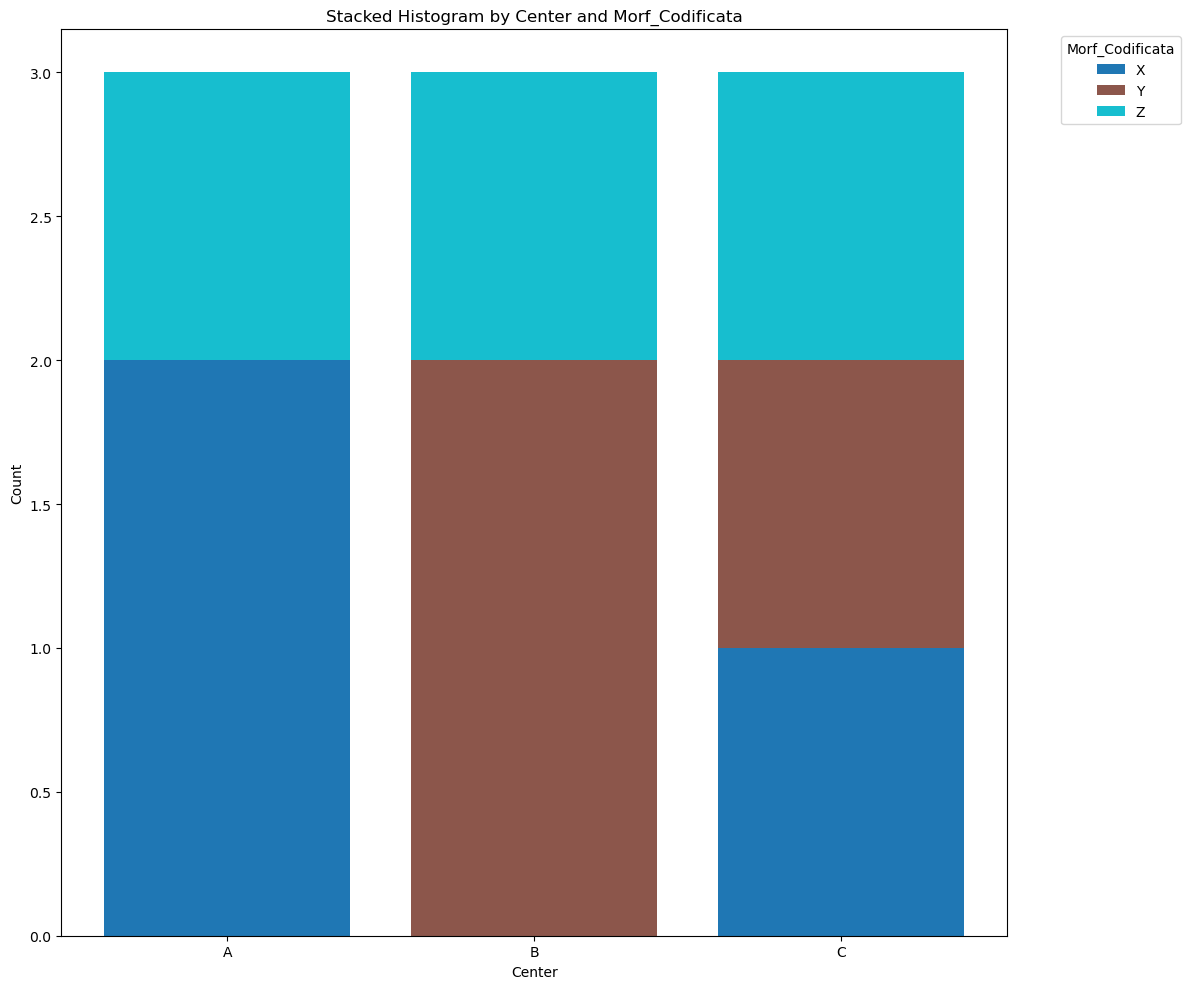

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def StackedHist(df, centers, morf_codificata):
    # Ensure centers and morf_codificata are numpy arrays
    centers = np.array(centers)
    morf_codificata = np.array(morf_codificata)

    # Add centers and morf_codificata to the DataFrame
    df['Center'] = centers
    df['Morf_Codificata'] = morf_codificata

    # Aggregate counts by Center and Morf_Codificata
    counts = df.groupby(['Center', 'Morf_Codificata']).size().unstack(fill_value=0)

    # Get unique centers and morf_codificata categories
    all_centers = sorted(set(df['Center']))
    all_labels = sorted(set(df['Morf_Codificata']))
    counts = counts.reindex(index=all_centers, columns=all_labels, fill_value=0)

    # Create the stacked histogram
    fig, ax = plt.subplots(figsize=(12, 10))

    # Initialize bottom positions for stacking
    bottom = np.zeros(len(all_centers))
    colors = plt.cm.tab10(np.linspace(0, 1, len(all_labels)))  # Use a colormap for distinct colors

    # Plot each Morf_Codificata category as a stacked bar segment
    for i, label in enumerate(all_labels):
        ax.bar(all_centers, counts[label], bottom=bottom, label=f'{label}', color=colors[i])
        bottom += counts[label].values  # Update bottom for next stack

    # Adding labels and title
    plt.xlabel('Center')
    plt.ylabel('Count')
    plt.title('Stacked Histogram by Center and Morf_Codificata')
    plt.legend(title='Morf_Codificata', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Example usage
# centers and morf_codificata as numpy arrays
centers = np.array(['A', 'B', 'A', 'C', 'B', 'A', 'C', 'C', 'B'])  # Replace with actual data
morf_codificata = np.array(['X', 'Y', 'X', 'Z', 'Y', 'Z', 'X', 'Y', 'Z'])  # Replace with actual data
df = pd.DataFrame()  # Empty DataFrame for the example; replace with your actual DataFrame

StackedHist(df, centers, morf_codificata)


      